In [1]:
import pandas as pd
import numpy as np

In [2]:
battery_data=pd.read_csv("C:\\Users\\Tanuja chowdary\\Desktop\\battery csv\\Battery_RUL.csv")

In [3]:
battery_data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [4]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = battery_data.apply(zscore)

# Identify outliers
outliers = (z_scores.abs() > 3).any(axis=1)

# Remove outliers
data_cleaned =battery_data[~outliers]

# Display the number of removed outliers
num_outliers_removed = outliers.sum()
num_outliers_removed


343

In [5]:
data_cleaned

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
...,...,...,...,...,...,...,...,...,...
15058,1107.0,773.00,180.480000,3.774,3.742,922.712000,1412.31,6659.62,5
15059,1108.0,770.44,179.523810,3.773,3.742,922.775000,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512000,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513000,1412.31,6637.12,2


In [6]:
battery_data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [7]:
battery_data.isna().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [8]:
battery_data.corr()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
Cycle_Index,1.000000,-0.011925,-0.012090,-0.782859,0.759850,-0.176486,-0.040622,-0.018305,-0.999756
Discharge Time (s),-0.011925,1.000000,0.444984,0.349161,-0.239410,0.776720,0.912536,0.935544,0.011957
Decrement 3.6-3.4V (s),-0.012090,0.444984,1.000000,0.199470,-0.132765,0.477091,0.343228,0.371610,0.011998
Max. Voltage Dischar. (V),-0.782859,0.349161,0.199470,1.000000,-0.718182,0.446070,0.286886,0.269009,0.782800
Min. Voltage Charg. (V),0.759850,-0.239410,-0.132765,-0.718182,1.000000,-0.344098,-0.216840,-0.200423,-0.759805
Time at 4.15V (s),-0.176486,0.776720,0.477091,0.446070,-0.344098,1.000000,0.568922,0.676859,0.176514
Time constant current (s),-0.040622,0.912536,0.343228,0.286886,-0.216840,0.568922,1.000000,0.953522,0.040675
Charging time (s),-0.018305,0.935544,0.371610,0.269009,-0.200423,0.676859,0.953522,1.000000,0.018299
RUL,-0.999756,0.011957,0.011998,0.782800,-0.759805,0.176514,0.040675,0.018299,1.000000


In [9]:
battery_data[battery_data.RUL==0]

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
1075,1113.0,679307.97,283252.125,4.216,3.256,51869.984,604521.09,604521.09,0
2154,1108.0,688111.95,8820.000,4.208,3.265,50939.996,609271.89,609271.89,0
3231,1108.0,655539.50,8010.016,4.210,3.277,49620.000,582561.04,582561.04,0
4312,1108.0,949261.22,161718.425,4.209,3.267,48869.988,875200.70,875200.70,0
5389,1134.0,682287.60,8100.000,4.207,3.264,50489.980,606491.96,606491.96,0
6467,1103.0,684375.81,8550.017,4.198,3.308,52709.985,610059.98,610059.98,0
7548,1108.0,958320.37,162508.742,4.200,3.287,50759.996,880728.10,880728.10,0
8628,1105.0,948083.85,7589.984,4.236,3.250,52649.988,875940.93,875940.93,0
9707,1108.0,679620.12,162247.007,4.207,3.279,51629.981,604181.47,604181.47,0
10786,1108.0,681626.10,-149011.834,4.213,3.254,52829.980,607607.63,607607.63,0


C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


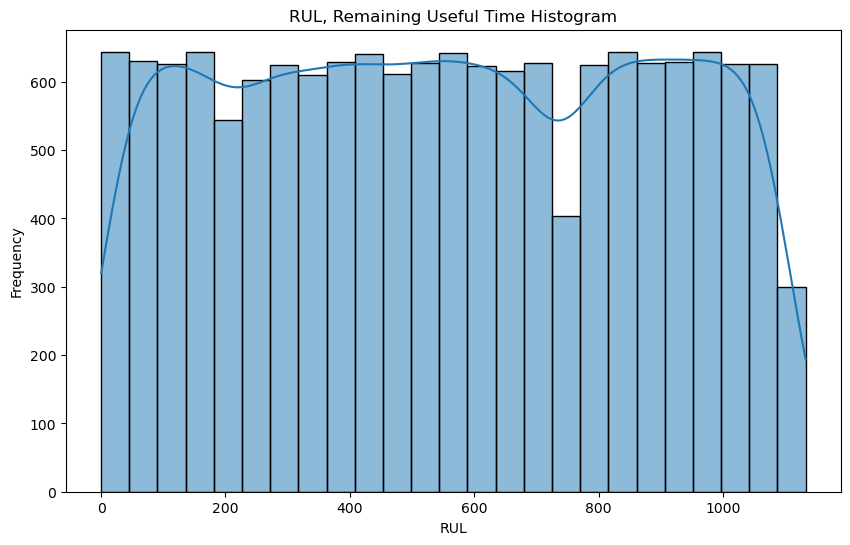

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(battery_data['RUL'], kde=True)
plt.title('RUL, Remaining Useful Time Histogram')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.show()


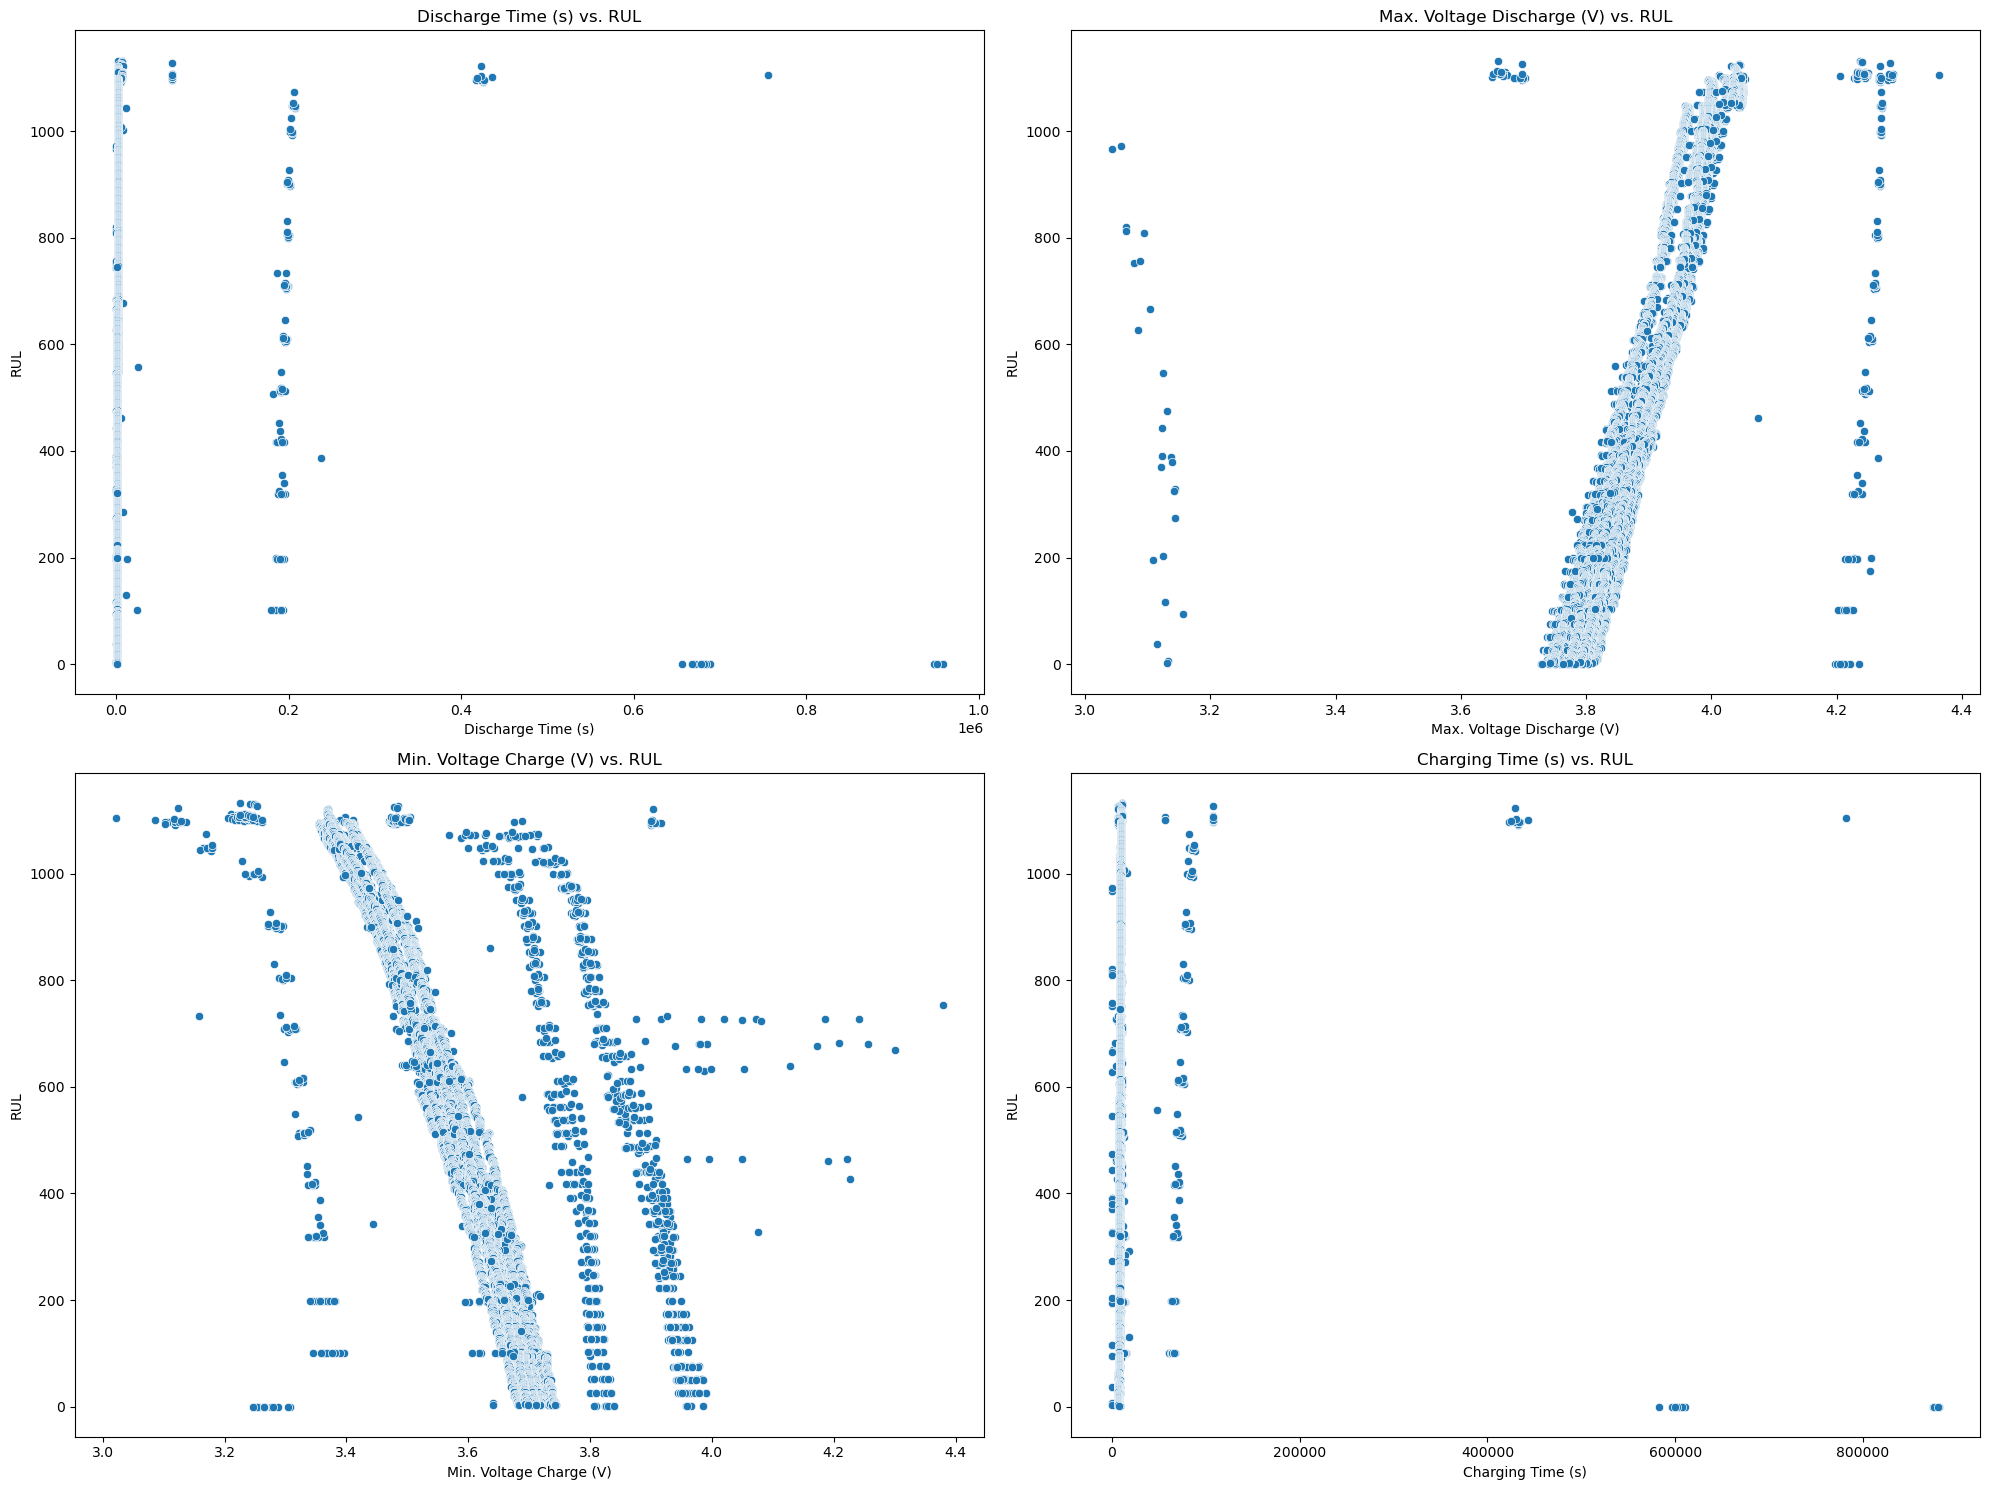

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Scatter plot: Discharge Time (s) vs. RUL
plt.subplot(2, 2, 1)
sns.scatterplot(x=battery_data['Discharge Time (s)'], y=battery_data['RUL'])
plt.title('Discharge Time (s) vs. RUL')
plt.xlabel('Discharge Time (s)')
plt.ylabel('RUL')

# Scatter plot: Max. Voltage Discharge (V) vs. RUL
plt.subplot(2, 2, 2)
sns.scatterplot(x=battery_data['Max. Voltage Dischar. (V)'], y=battery_data['RUL'])
plt.title('Max. Voltage Discharge (V) vs. RUL')
plt.xlabel('Max. Voltage Discharge (V)')
plt.ylabel('RUL')

# Scatter plot: Min. Voltage Charge (V) vs. RUL
plt.subplot(2, 2, 3)
sns.scatterplot(x=battery_data['Min. Voltage Charg. (V)'], y=battery_data['RUL'])
plt.title('Min. Voltage Charge (V) vs. RUL')
plt.xlabel('Min. Voltage Charge (V)')
plt.ylabel('RUL')

# Scatter plot: Charging Time (s) vs. RUL
plt.subplot(2, 2, 4)
sns.scatterplot(x=battery_data['Charging time (s)'], y=battery_data['RUL'])
plt.title('Charging Time (s) vs. RUL')
plt.xlabel('Charging Time (s)')
plt.ylabel('RUL')

plt.tight_layout()


plt.show()


C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

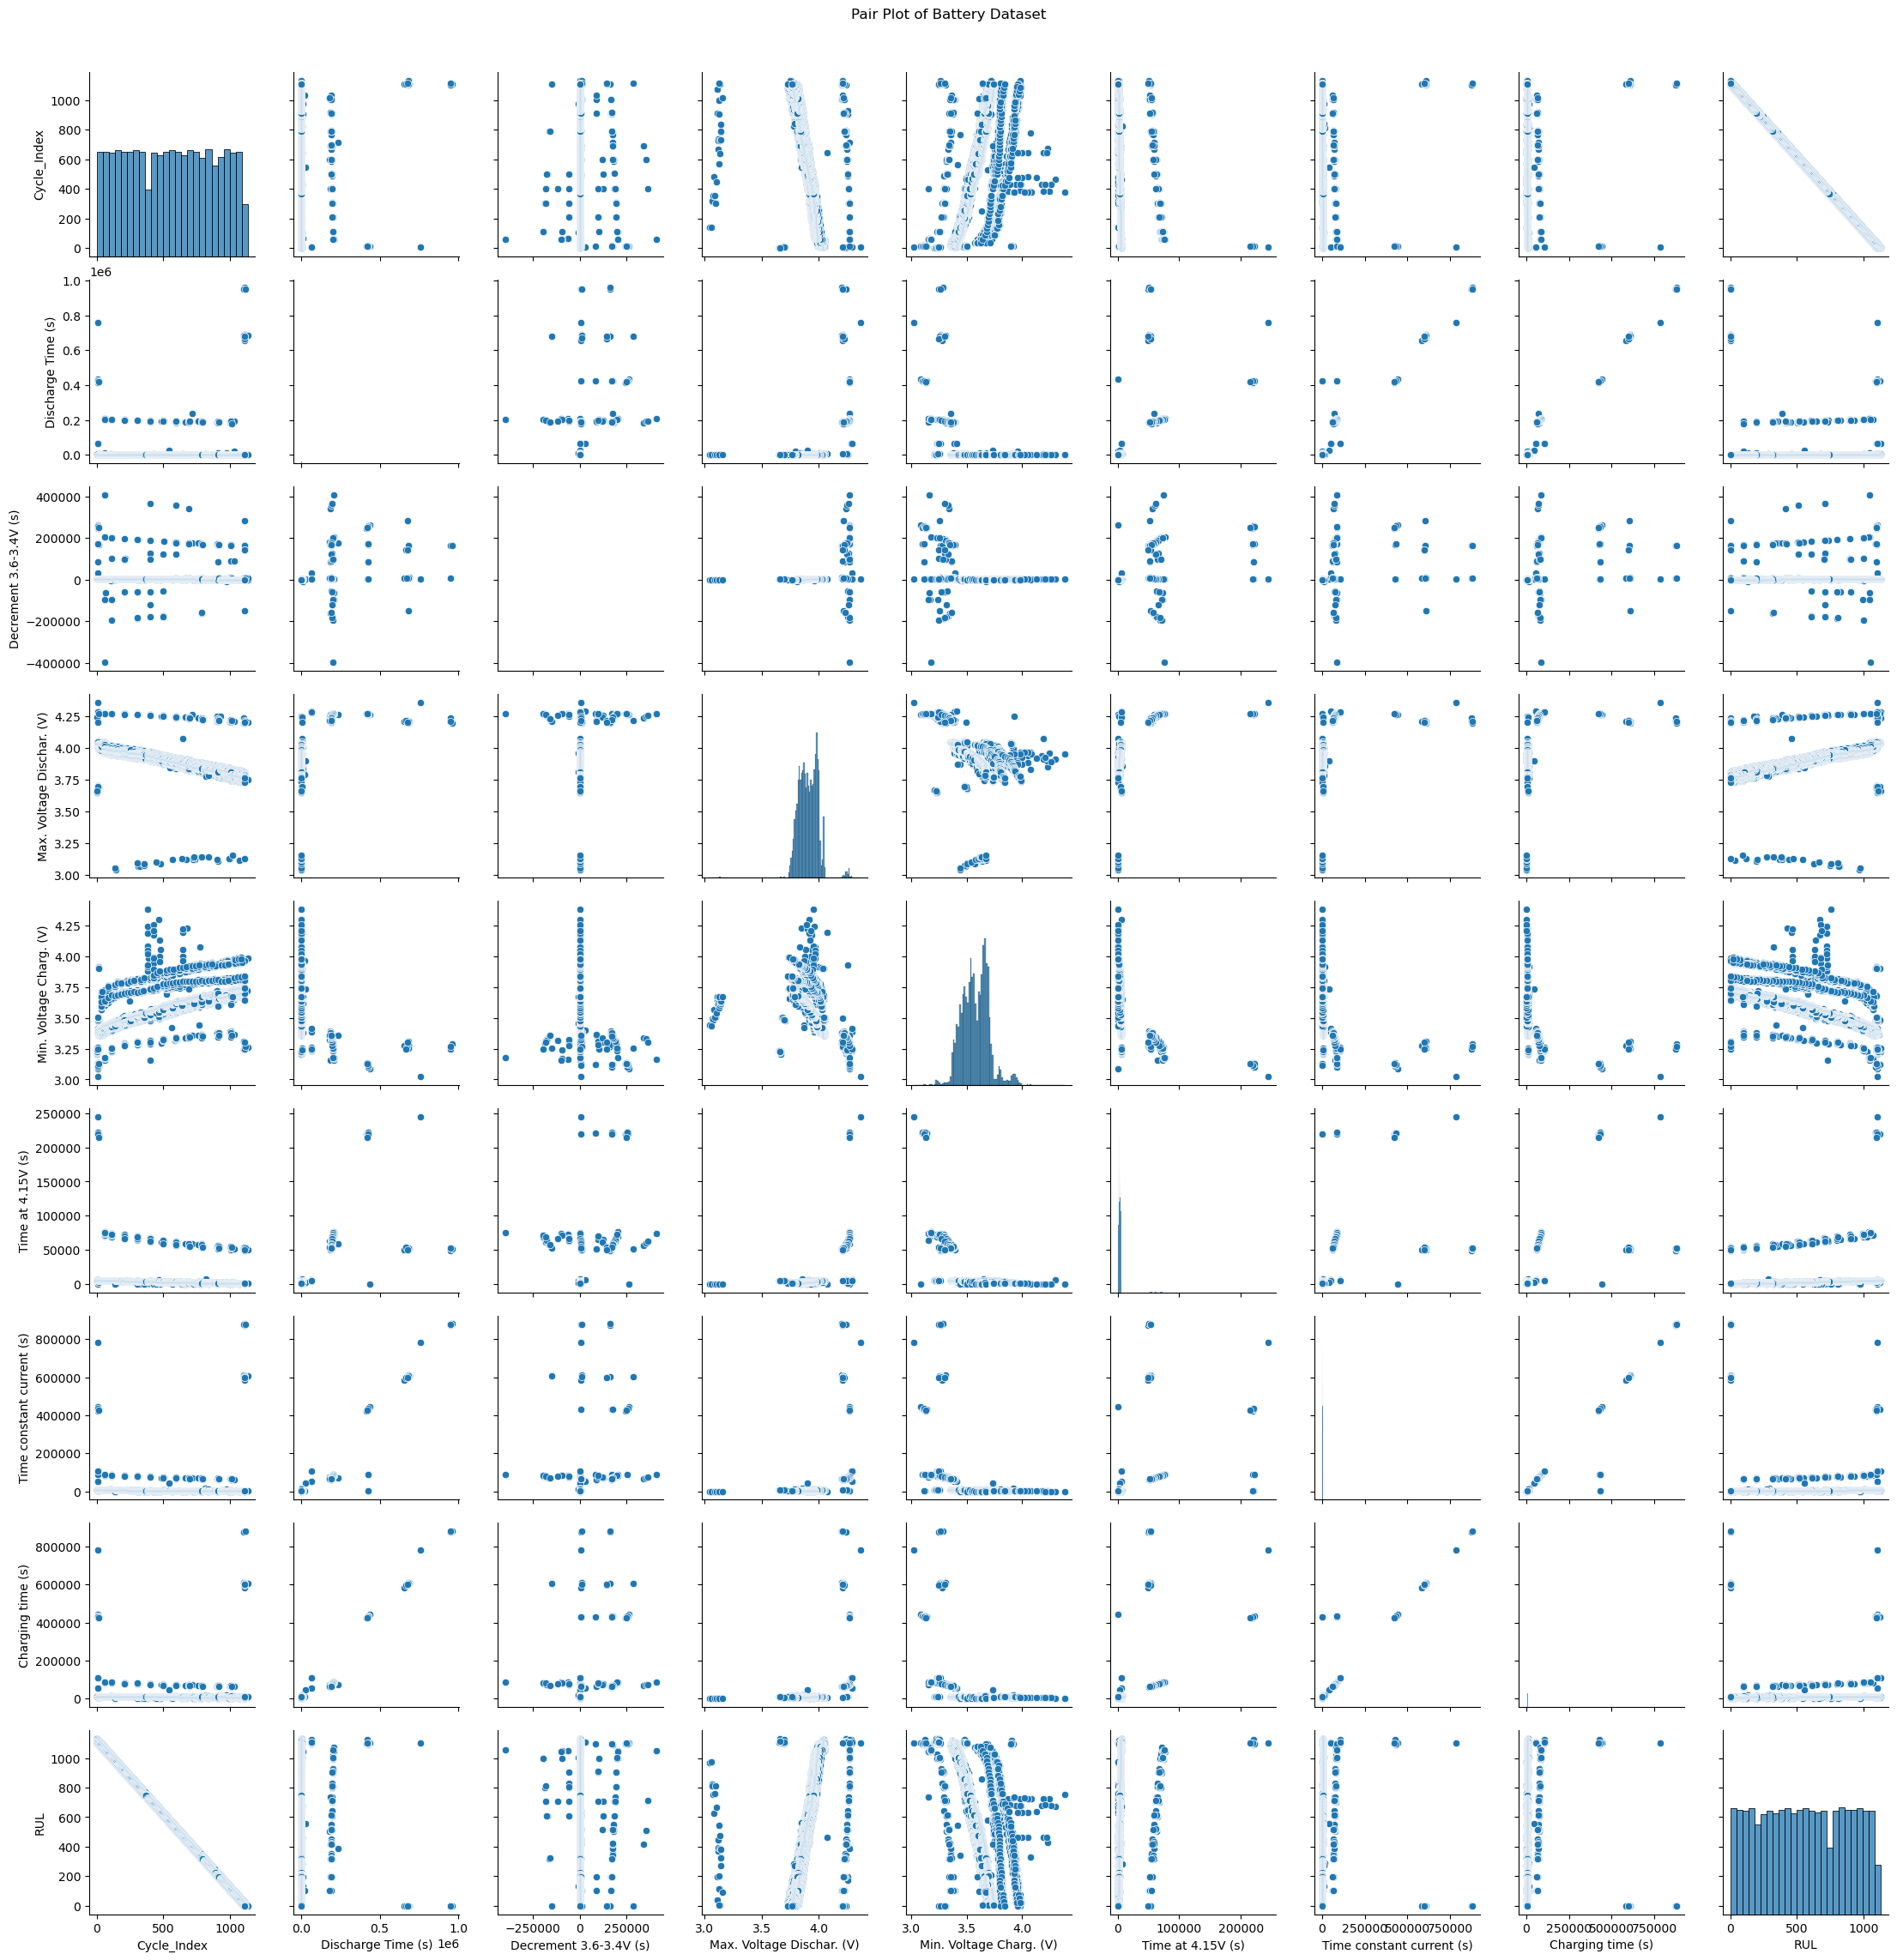

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(battery_data)
plt.suptitle('Pair Plot of Battery Dataset', y=1.02)
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
X=data_cleaned.drop(['RUL'],axis='columns')
y=data_cleaned['RUL']

In [15]:
data_cleaned.shape

(14721, 9)

In [16]:
from sklearn.linear_model import LinearRegression
Lig=LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [19]:
len(X_train)

11776

In [20]:
len(X_test)

2945

In [21]:
len(y_train)

11776

In [22]:
Lig.fit(X_train,y_train)

LinearRegression()

In [23]:
Lig.score(X_test,y_test)

0.9995143268611507

In [24]:
y_pred=Lig.predict(X_test)

In [25]:
y_pred

array([172.85495648, 703.02567041, 256.07986491, ..., 728.68393076,
       230.54626043, 974.02172523])

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Training MSE: 1.8137755010190226
Training R2: 0.9999821991612585
Testing MSE: 12.922760067911714
Testing R2: 0.9998766201332108


In [27]:
battery_data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [28]:
battery_data.shape

(15064, 9)

In [29]:
from sklearn.inspection import permutation_importance
import pandas as pd


rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

print(perm_importance_df)


                     Feature  Importance
0                Cycle_Index    1.997107
3  Max. Voltage Dischar. (V)    0.000318
1         Discharge Time (s)    0.000137
5          Time at 4.15V (s)    0.000118
7          Charging time (s)    0.000099
4    Min. Voltage Charg. (V)    0.000085
2     Decrement 3.6-3.4V (s)    0.000068
6  Time constant current (s)    0.000041


In [30]:
X_pca=battery_data[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Charging time (s)', 'Time at 4.15V (s)', 'Time constant current (s)']] 

In [31]:
len(X_train)

11776

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Training MSE: 1.8137755010190226
Training R2: 0.9999821991612585
Testing MSE: 12.922760067911714
Testing R2: 0.9998766201332108


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

#  RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive MSE and R2
cv_mse_scores = -cv_scores  # Take the negative of scores to get MSE
cv_r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation results
print(f'Cross-Validation MSE: {np.mean(cv_mse_scores)}')
print(f'Cross-Validation R2: {np.mean(cv_r2_scores)}')

/
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Cross-Validation MSE: 16.12535875097596
Cross-Validation R2: 0.9998416558898173
Training MSE: 1.8137755010190226
Training R2: 0.9999821991612585
Testing MSE: 12.922760067911714
Testing R2: 0.9998766201332108


In [34]:
from sklearn.decomposition import PCA
import pandas as pd


pca = PCA(n_components=5, random_state=42)
X_pca1=pca.fit(X)


In [35]:
X_pca1

PCA(n_components=5, random_state=42)

# PCA(Principle components Analysis) for feature selection

In [36]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd



# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model 
rf_model.fit(X_train_pca, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_pca)
y_pred_test = rf_model.predict(X_test_pca)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Training MSE: 81.84120298063858
Training R2: 0.9991967903106801
Testing MSE: 1018.3848521901529
Testing R2: 0.990276985199514


# selectkbest for features_extraction

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SelectKBest to select the top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Training the model using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_selected)
y_pred_test = rf_model.predict(X_test_selected)

#  MSE score and R2 score on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Printing results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

# Printing the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')


Training MSE: 2.2386537873641306
Training R2: 0.9999781877141118
Testing MSE: 11.791325670628185
Testing R2: 0.9998841605010451
Selected Features: Index(['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Time at 4.15V (s)'], dtype='object')


In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X and y are your features and target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SelectKBest to select the top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Training the model using DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Predictions
y_pred_train = dt_model.predict(X_train_selected)
y_pred_test = dt_model.predict(X_test_selected)

# MSE score and R2 score on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Printing results
print(f'DecisionTreeRegressor Training MSE: {mse_train}')
print(f'DecisionTreeRegressor Training R2: {r2_train}')
print(f'DecisionTreeRegressor Testing MSE: {mse_test}')
print(f'DecisionTreeRegressor Testing R2: {r2_test}')

# Printing the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')


DecisionTreeRegressor Training MSE: 0.0
DecisionTreeRegressor Training R2: 1.0
DecisionTreeRegressor Testing MSE: 22.118845500848895
DecisionTreeRegressor Testing R2: 0.9997827016188129
Selected Features: Index(['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Time at 4.15V (s)'], dtype='object')


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import pandas as pd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SelectKBest to select the top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with XGBRegressor
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predictions
y_pred_train = best_xgb_model.predict(X_train_selected)
y_pred_test = best_xgb_model.predict(X_test_selected)

# Calculate MSE and R2 scores on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Printing results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

# Printing the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')

# Printing the best parameters
print(f'Best Parameters: {grid_search.best_params_}')


Training MSE: 5.8610581859842465
Training R2: 0.999942892877192
Testing MSE: 14.06279679518351
Testing R2: 0.99986184527676
Selected Features: Index(['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Time at 4.15V (s)'], dtype='object')
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


In [40]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import time

# Assuming X and y are your features and target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SelectKBest to select the top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define models and parameter grids
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'SVR': (SVR(), {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0]}),
    'GradientBoostingRegressor': (
        GradientBoostingRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    ),
    'LightGBM': (
        lgb.LGBMRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 61, 91]}
    ),
    'XGBoost': (
        xgb.XGBRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    ),
    'CatBoost': (
        CatBoostRegressor(verbose=0), 
        {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]}
    )
}

# Initialize lists to store results
results = []

# Perform model training and evaluation
for model_name, (model, param_grid) in models.items():
    print(f'Evaluating {model_name}...')
    
    start_time = time.time()
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred_train = best_model.predict(X_train_selected)
    y_pred_test = best_model.predict(X_test_selected)
    
    # Calculate MSE and R2 scores on training and testing sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Execution Time (s)': execution_time,
        'Best Parameters': grid_search.best_params_,
        'Training MSE': mse_train,
        'Training R2': r2_train,
        'Testing MSE': mse_test,
        'Testing R2': r2_test
    })
    
    # Print the results for each model
    print(f'{model_name}:\n'
          f'Execution Time: {execution_time:.2f} seconds\n'
          f'Training MSE: {mse_train:.2f}\n'
          f'Training R2: {r2_train:.2f}\n'
          f'Testing MSE: {mse_test:.2f}\n'
          f'Testing R2: {r2_test:.2f}\n'
          f'Best Parameters: {grid_search.best_params_}\n')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# Printing the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')


Evaluating LinearRegression...
LinearRegression:
Execution Time: 0.15 seconds
Training MSE: 51.13
Training R2: 1.00
Testing MSE: 45.98
Testing R2: 1.00
Best Parameters: {}

Evaluating Ridge...
Ridge:
Execution Time: 0.16 seconds
Training MSE: 51.13
Training R2: 1.00
Testing MSE: 45.99
Testing R2: 1.00
Best Parameters: {'alpha': 0.1}

Evaluating Lasso...
Lasso:
Execution Time: 0.05 seconds
Training MSE: 51.16
Training R2: 1.00
Testing MSE: 45.98
Testing R2: 1.00
Best Parameters: {'alpha': 0.1}

Evaluating ElasticNet...
ElasticNet:
Execution Time: 0.15 seconds
Training MSE: 359.43
Training R2: 1.00
Testing MSE: 372.29
Testing R2: 1.00
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}

Evaluating SVR...
SVR:
Execution Time: 63.24 seconds
Training MSE: 268.90
Training R2: 1.00
Testing MSE: 257.25
Testing R2: 1.00
Best Parameters: {'C': 10.0, 'epsilon': 0.1}

Evaluating GradientBoostingRegressor...
GradientBoostingRegressor:
Execution Time: 30.33 seconds
Training MSE: 2.45
Training R2: 1.00


In [41]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
import time

# Assuming X and y are your features and target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SelectKBest to select the top 3 features
k = 3
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Define models and parameter grids
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    'ElasticNet': (ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'SVR': (SVR(), {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0]}),
    'GradientBoostingRegressor': (
        GradientBoostingRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    ),
    'LightGBM': (
        lgb.LGBMRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 61, 91]}
    ),
    'XGBoost': (
        xgb.XGBRegressor(), 
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    ),
    'CatBoost': (
        CatBoostRegressor(verbose=0), 
        {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]}
    ),
    'RandomForest': (
        RandomForestRegressor(), 
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    )
}

# Initialize lists to store results
results = []

# Perform model training and evaluation
for model_name, (model, param_grid) in models.items():
    print(f'Evaluating {model_name}...')
    
    start_time = time.time()
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_selected, y_train)
    
    end_time = time.time()
    execution_time = end_time - start_time
    
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred_train = best_model.predict(X_train_selected)
    y_pred_test = best_model.predict(X_test_selected)
    
    # Calculate MSE, RMSE, MAE and R2 scores on training and testing sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Store the results
    results.append({
        'Model': model_name,
        'Execution Time (s)': execution_time,
        'Best Parameters': grid_search.best_params_,
        'Training MSE': mse_train,
        'Training RMSE': rmse_train,
        'Training MAE': mae_train,
        'Training R2': r2_train,
        'Testing MSE': mse_test,
        'Testing RMSE': rmse_test,
        'Testing MAE': mae_test,
        'Testing R2': r2_test
    })
    
    # Print the results for each model
    print(f'{model_name}:\n'
          f'Execution Time: {execution_time:.2f} seconds\n'
          f'Training MSE: {mse_train:.2f}\n'
          f'Training RMSE: {rmse_train:.2f}\n'
          f'Training MAE: {mae_train:.2f}\n'
          f'Training R2: {r2_train:.2f}\n'
          f'Testing MSE: {mse_test:.2f}\n'
          f'Testing RMSE: {rmse_test:.2f}\n'
          f'Testing MAE: {mae_test:.2f}\n'
          f'Testing R2: {r2_test:.2f}\n'
          f'Best Parameters: {grid_search.best_params_}\n')

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Sort the DataFrame by Testing MSE in ascending order
results_df = results_df.sort_values(by='Testing MSE')

# Print the results DataFrame
print(results_df)

# Save the results to an Excel file
results_df.to_excel('model_comparison_results.xlsx', index=False)

# Printing the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Selected Features: {selected_features}')


Evaluating LinearRegression...
LinearRegression:
Execution Time: 0.03 seconds
Training MSE: 51.13
Training RMSE: 7.15
Training MAE: 4.56
Training R2: 1.00
Testing MSE: 45.98
Testing RMSE: 6.78
Testing MAE: 4.39
Testing R2: 1.00
Best Parameters: {}

Evaluating Ridge...
Ridge:
Execution Time: 0.07 seconds
Training MSE: 51.13
Training RMSE: 7.15
Training MAE: 4.56
Training R2: 1.00
Testing MSE: 45.99
Testing RMSE: 6.78
Testing MAE: 4.39
Testing R2: 1.00
Best Parameters: {'alpha': 0.1}

Evaluating Lasso...
Lasso:
Execution Time: 0.07 seconds
Training MSE: 51.16
Training RMSE: 7.15
Training MAE: 4.54
Training R2: 1.00
Testing MSE: 45.98
Testing RMSE: 6.78
Testing MAE: 4.37
Testing R2: 1.00
Best Parameters: {'alpha': 0.1}

Evaluating ElasticNet...
ElasticNet:
Execution Time: 0.20 seconds
Training MSE: 359.43
Training RMSE: 18.96
Training MAE: 14.42
Training R2: 1.00
Testing MSE: 372.29
Testing RMSE: 19.29
Testing MAE: 14.12
Testing R2: 1.00
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}

E

In [80]:
import joblib

# Assuming the RandomForestRegressor is the best performing model
# You can find its index in the results list
random_forest_result = next(item for item in results if item['Model'] == 'RandomForest')

# Extract the best parameters for RandomForestRegressor
best_rf_params = random_forest_result['Best Parameters']

# Initialize the RandomForestRegressor with the best parameters
best_rf_model = RandomForestRegressor().set_params(**best_rf_params)

# Fit the best RandomForestRegressor on the entire training set (with selected features)
best_rf_model.fit(X_train_selected, y_train)

# Save the best RandomForestRegressor model to a file
joblib.dump(best_rf_model, 'RUL_random_forest_model.pkl')

print('Best RandomForest model saved to best_random_forest_model.pkl')



Best RandomForest model saved to best_random_forest_model.pkl


In [83]:
X = battery_data[['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Time at 4.15V (s)']]
y = battery_data['RUL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_regression, k='all')  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# Save the model and selector
joblib.dump(model, 'RUL_random_forest_model1.pkl')
joblib.dump(selector, 'selector1.pkl')

['selector1.pkl']

In [81]:
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X_train_scaled, y_train)

# Save the selector
joblib.dump(selector, 'selector.pkl')

['selector.pkl']

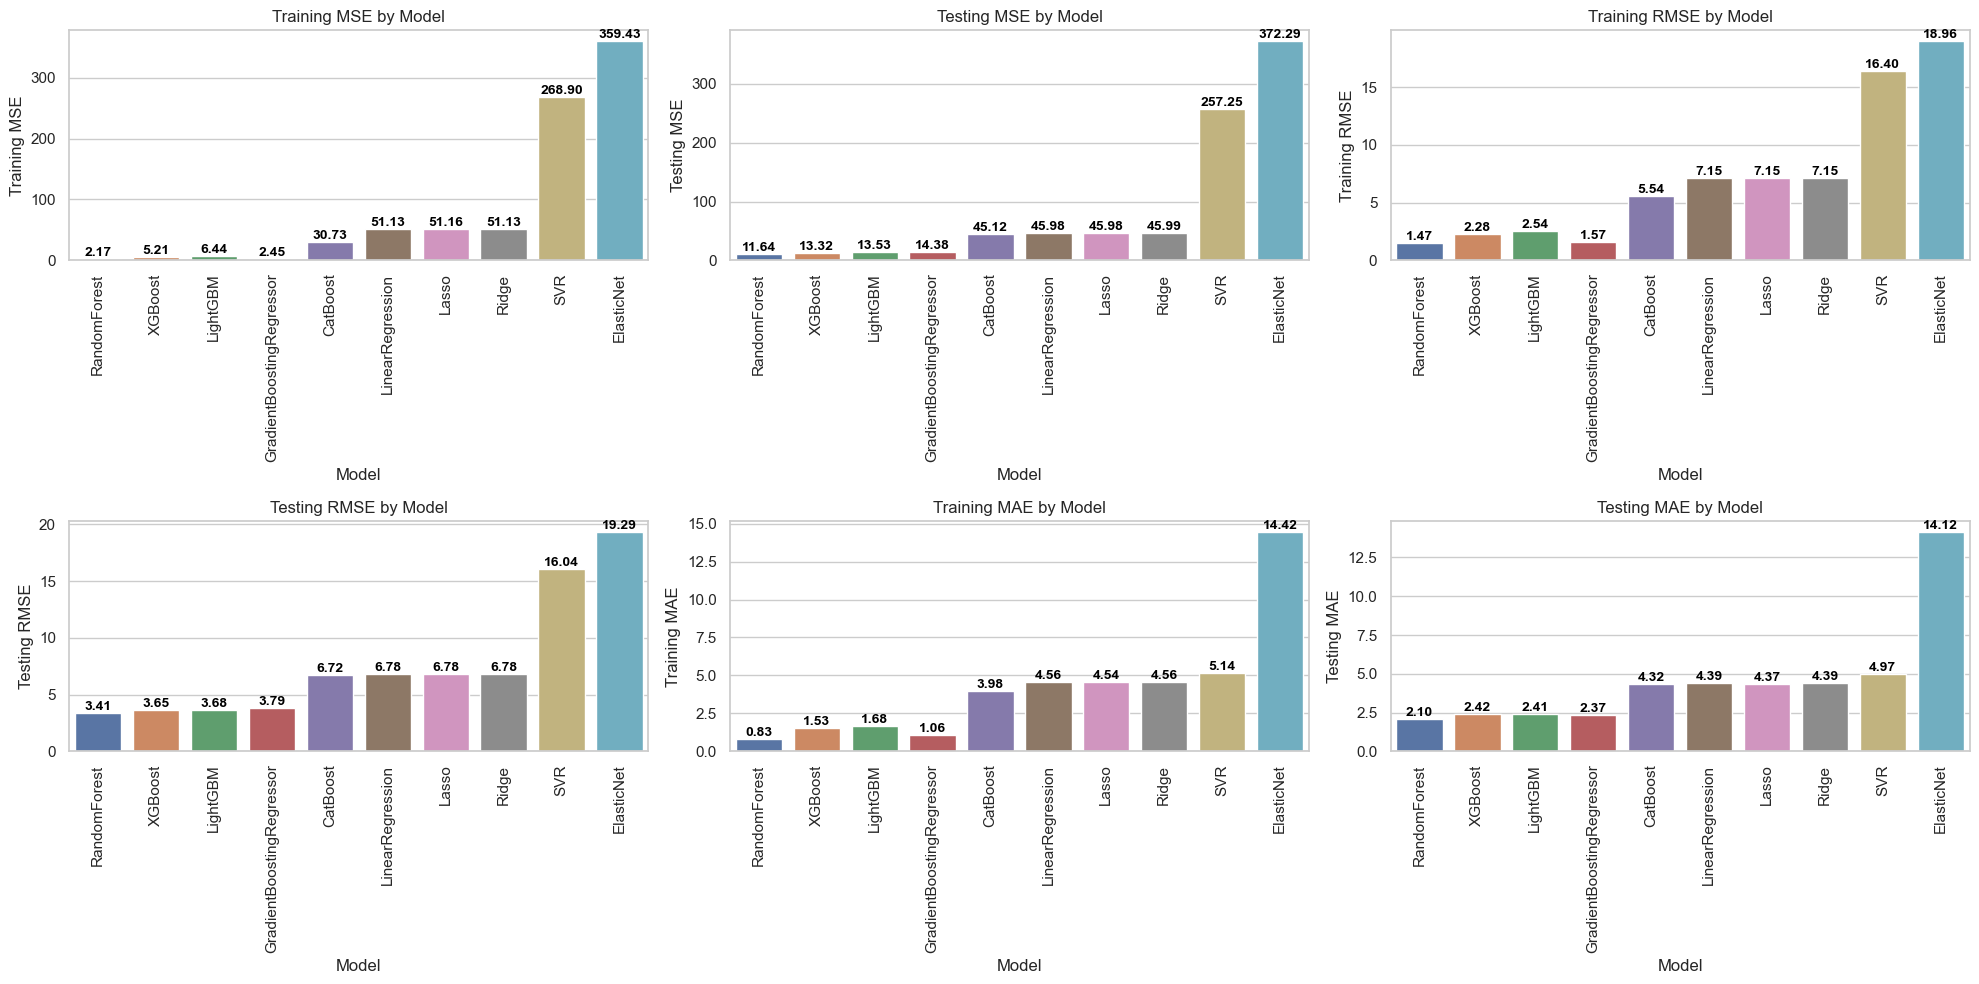

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `results_df` is the DataFrame containing the results
# If not already calculated, calculate RMSE for both training and testing sets
results_df['Training RMSE'] = np.sqrt(results_df['Training MSE'])
results_df['Testing RMSE'] = np.sqrt(results_df['Testing MSE'])

# Set the plot style
sns.set(style="whitegrid")

# Define the metrics to plot
metrics = ['Training MSE', 'Testing MSE', 'Training RMSE', 'Testing RMSE', 'Training MAE', 'Testing MAE']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Function to annotate bars with values
def annotate_bars(ax, metric):
    for bar in ax.patches:
        bar_value = bar.get_height()
        text = f'{bar_value:.2f}'
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_height()
        ax.text(text_x, text_y, text, ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Plot each metric
for i, metric in enumerate(metrics):
    ax = sns.barplot(x='Model', y=metric, data=results_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=90)
    annotate_bars(ax, metric)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

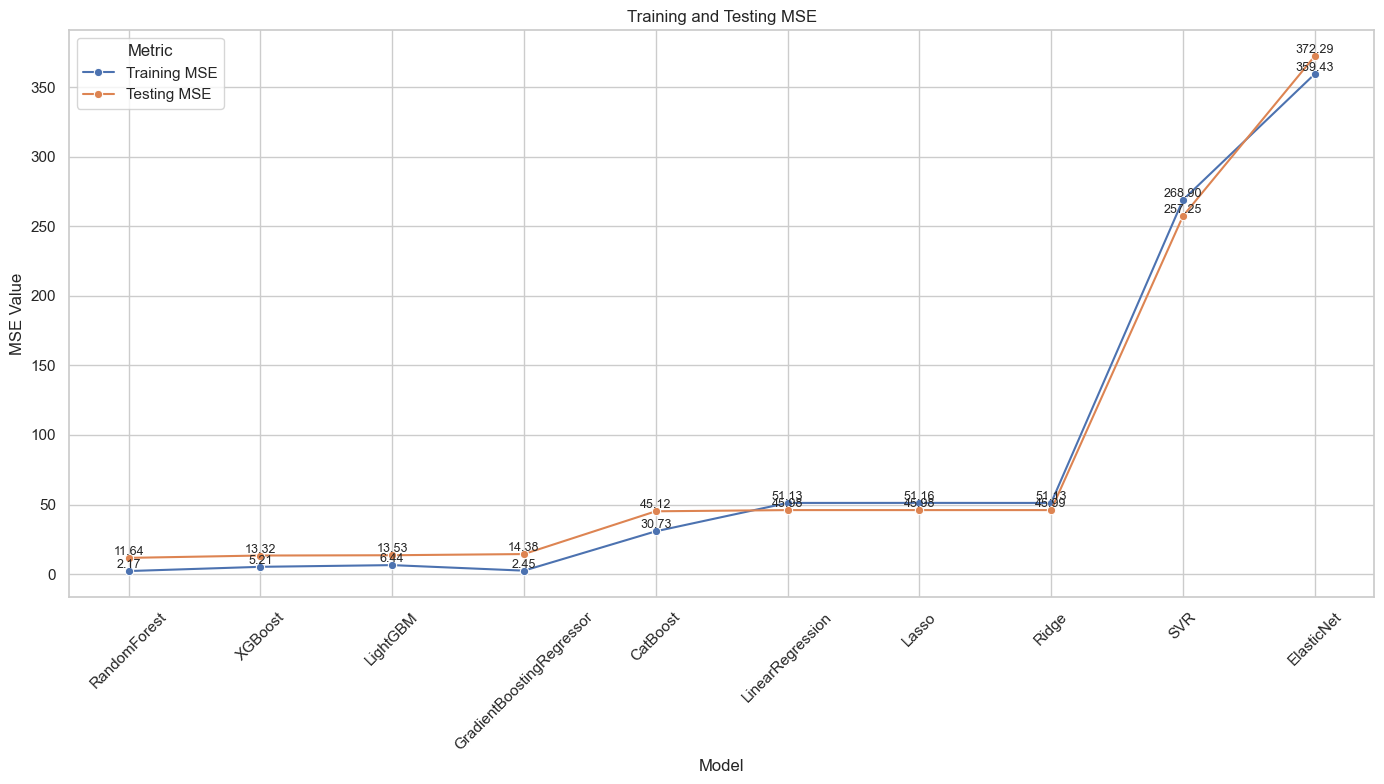

C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

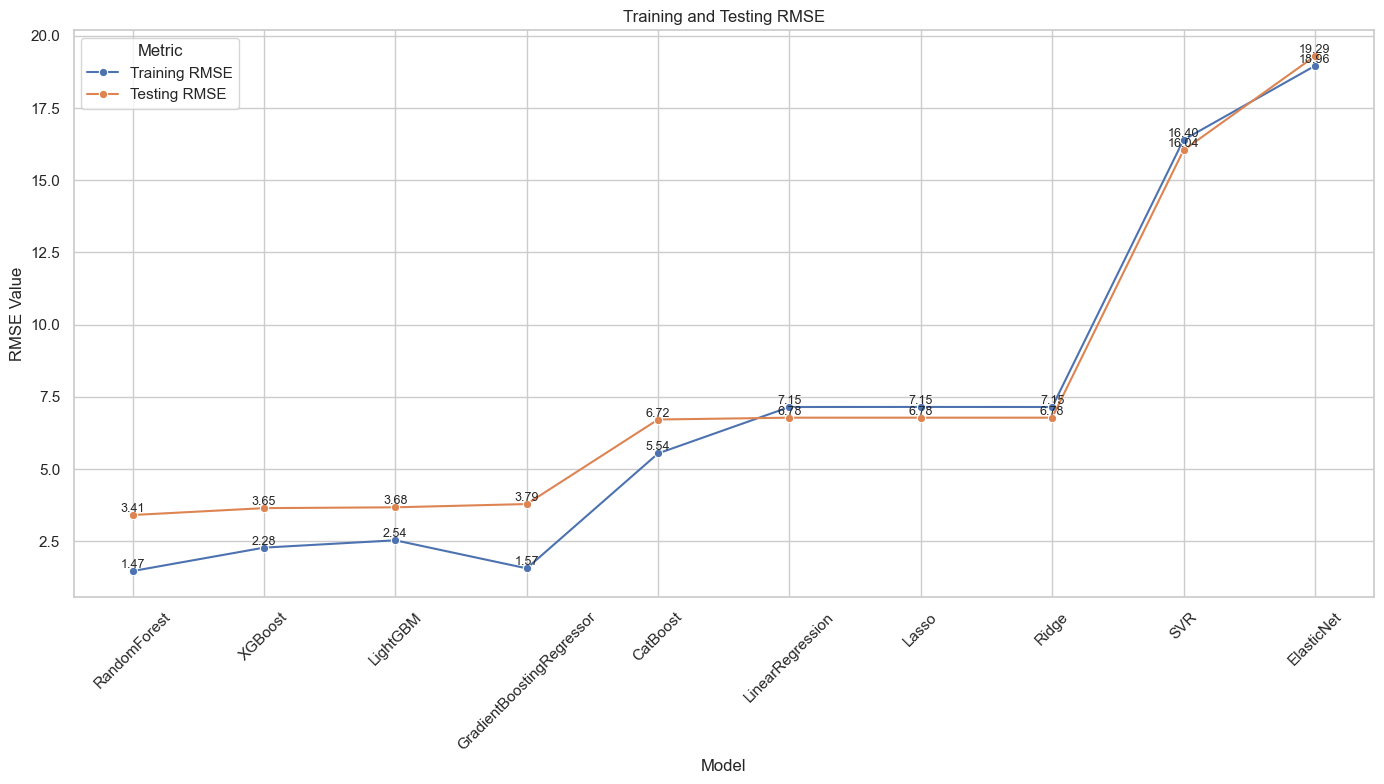

C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tanuja chowdary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

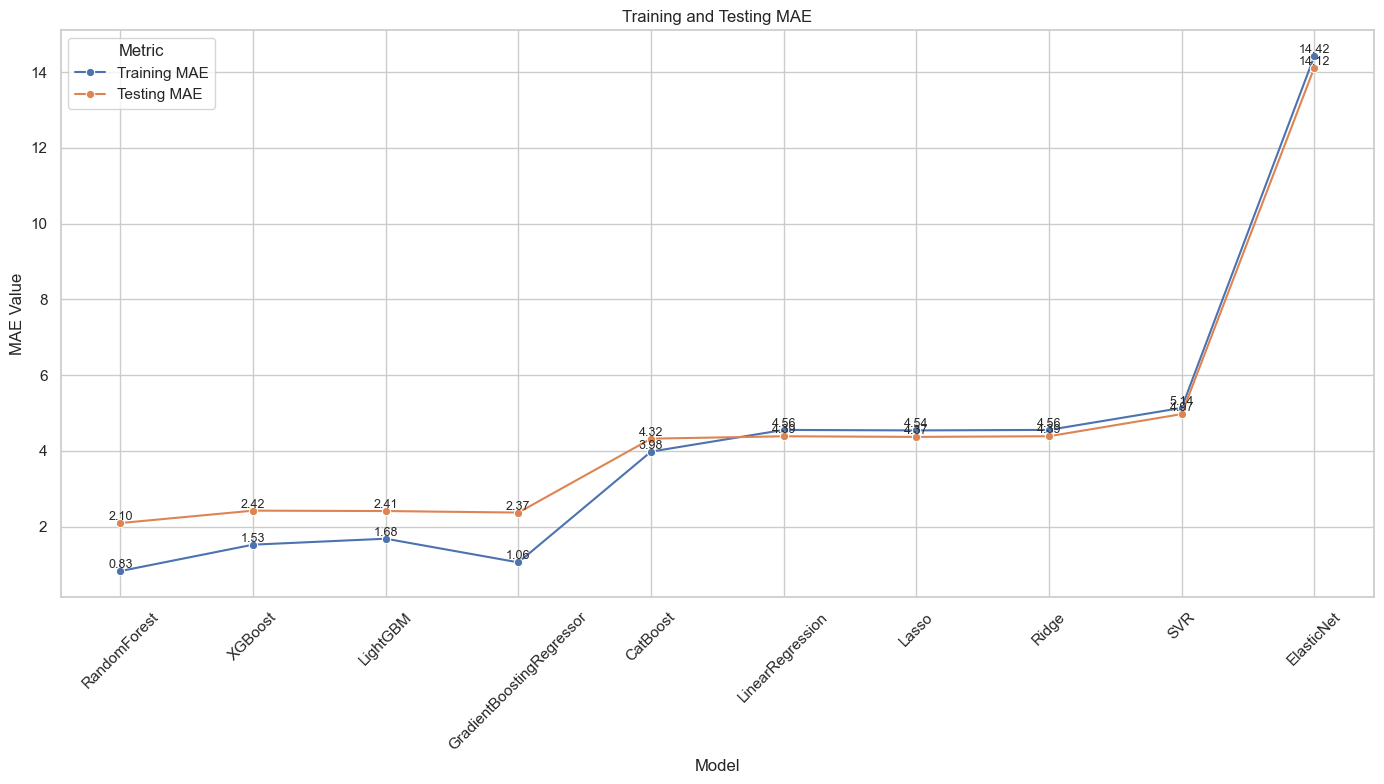

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `results_df` is the DataFrame containing the results
# If not already calculated, calculate RMSE for both training and testing sets
results_df['Training RMSE'] = np.sqrt(results_df['Training MSE'])
results_df['Testing RMSE'] = np.sqrt(results_df['Testing MSE'])

# Set the plot style
sns.set(style="whitegrid")

# Plotting Training and Testing MSE
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Model', y='Training MSE', marker='o', label='Training MSE')
sns.lineplot(data=results_df, x='Model', y='Testing MSE', marker='o', label='Testing MSE')
plt.title('Training and Testing MSE')
plt.xlabel('Model')
plt.ylabel('MSE Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True)

# Annotate each point with its value
for line in plt.gca().lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, y_value, f'{y_value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Training_Testing_MSE_line1.png')
plt.show()

# Plotting Training and Testing RMSE
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Model', y='Training RMSE', marker='o', label='Training RMSE')
sns.lineplot(data=results_df, x='Model', y='Testing RMSE', marker='o', label='Testing RMSE')
plt.title('Training and Testing RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True)

# Annotate each point with its value
for line in plt.gca().lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, y_value, f'{y_value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Training_Testing_RMSE_line1.png')
plt.show()

# Plotting Training and Testing MAE
plt.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='Model', y='Training MAE', marker='o', label='Training MAE')
sns.lineplot(data=results_df, x='Model', y='Testing MAE', marker='o', label='Testing MAE')
plt.title('Training and Testing MAE')
plt.xlabel('Model')
plt.ylabel('MAE Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True)

# Annotate each point with its value
for line in plt.gca().lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, y_value, f'{y_value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('Training_Testing_MAE_line1.png')
plt.show()


# RFE(Recursive Feature elimination) for feature_Extraction

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  RFE(Recursive feature elimination)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=3, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rfe)
y_pred_test = rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Selected features: Index(['Cycle_Index', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)'], dtype='object')
Feature ranking: [1 2 1 1 4 5 6 3]
Training MSE: 2.2591132022943974
Training R2: 0.9999779883681433
Testing MSE: 14.222629637069256
Testing R2: 0.9998602750583777


# mutual_information_regression and selectKbest for feature_extraction

In [45]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applied SelectKBest with mutual_info_regression to select top k features
k = 5  # Number of features to select
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_train_mi = selector.fit_transform(X_train, y_train)
X_test_mi = selector.transform(X_test)

# Training a RandomForestRegressor on the selected features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_mi, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_mi)
y_pred_test = rf_model.predict(X_test_mi)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Printing results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Training MSE: 3.320345261548912
Training R2: 0.9999676482712507
Testing MSE: 20.078697758913417
Testing R2: 0.9998027442924546


# feature_Extraction using Random forest feature_importances

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor to get feature importances
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1][:4]  # Top 5 features

# Select top features
X_train_rf = X_train.iloc[:, indices]
X_test_rf = X_test.iloc[:, indices]

# Train a new RandomForestRegressor on the selected features
rf_model.fit(X_train_rf, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rf)
y_pred_test = rf_model.predict(X_test_rf)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Training MSE: 2.294833194633152
Training R2: 0.9999776403309929
Testing MSE: 13.97085073005094
Testing R2: 0.999862748566722


# RFE(Recursive Feature Elimination) for 4 selected features

In [47]:
#selected features 4
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=4, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rfe)
y_pred_test = rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)'],
      dtype='object')
Feature ranking: [1 1 1 1 3 4 5 2]
Training MSE: 1.801329526154891
Training R2: 0.9999824487757665
Testing MSE: 10.424855687606108
Testing R2: 0.9998975848777939


# RFE(Recursive Feature Elimination) for 3 selected features

In [48]:
# 3 selected festures 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=3, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rfe)
y_pred_test = rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)'], dtype='object')
Feature ranking: [1 2 1 1 4 5 6 3]
Training MSE: 2.2591132022943974
Training R2: 0.9999779883681433
Testing MSE: 14.222629637069256
Testing R2: 0.9998602750583777


# RFE(Recursive Feature Elimination) for 2 selected features

In [49]:
# for 2 selected features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=2, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rfe)
y_pred_test = rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Decrement 3.6-3.4V (s)'], dtype='object')
Feature ranking: [1 3 1 2 5 6 7 4]
Training MSE: 6.0918953043788004
Training R2: 0.9999406437195739
Testing MSE: 37.42867241518058
Testing R2: 0.9996322959113987


# RFE(Recursive Feature Elimination) for 6 selected features

In [50]:
# for 6 selected features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=6, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_rfe)
y_pred_test = rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Charging time (s)'],
      dtype='object')
Feature ranking: [1 1 1 1 1 2 3 1]
Training MSE: 1.7232358780570647
Training R2: 0.9999832096799259
Testing MSE: 10.09566013582343
Testing R2: 0.999900818937207


# plotting MSE for Different Numbers of Selected Features(using RandomForestRegressor)

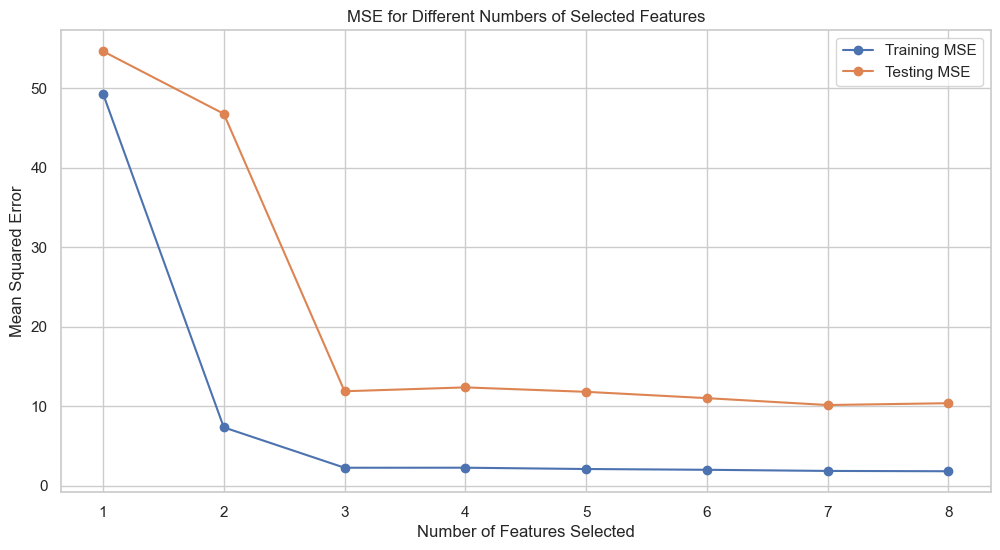

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split



# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store MSE values
mse_train_list = []
mse_test_list = []
feature_counts = range(1, X_train.shape[1] + 1)

# Loop over different numbers of top features
for k in feature_counts:
    # Select top k features using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_kbest = selector.fit_transform(X_train, y_train)
    X_test_kbest = selector.transform(X_test)

    # Train a RandomForestRegressor on the selected features
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_kbest, y_train)

    # Predictions
    y_pred_train = rf_model.predict(X_train_kbest)
    y_pred_test = rf_model.predict(X_test_kbest)

    # Compute MSE for training and testing sets
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Append MSE values to lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plot MSE values
plt.figure(figsize=(12, 6))
plt.plot(feature_counts, mse_train_list, label='Training MSE', marker='o')
plt.plot(feature_counts, mse_test_list, label='Testing MSE', marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Numbers of Selected Features')
plt.legend()
plt.grid(True)
plt.show()


# RFE Selected Features(using DecsionTreeRegressor)

In [52]:
# 3 selected festures 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
dt_model = DecisionTreeRegressor(random_state=42)
rfe = RFE(estimator=dt_model, n_features_to_select=3, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Printing selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
dt_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = dt_model.predict(X_train_rfe)
y_pred_test = dt_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)'], dtype='object')
Feature ranking: [1 2 1 1 4 5 6 3]
Training MSE: 0.007854959239130434
Training R2: 0.9999999234653355
Testing MSE: 29.393039049235995
Testing R2: 0.9997112390064244


# RFE Selected Features(using LinearRegression)

In [53]:
# 3 selected festures 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=3, step=1)


rfe.fit(X_train, y_train)

# Get the support and ranking of the features
selected_features = rfe.support_
feature_ranking = rfe.ranking_

# Print selected features and their ranking
selected_features_names = X_train.columns[selected_features]
print("Selected features:", selected_features_names)
print("Feature ranking:", feature_ranking)


X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the RandomForestRegressor on the selected features
lr_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train_rfe)
y_pred_test = lr_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Printing results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')

Selected features: Index(['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)'], dtype='object')
Feature ranking: [1 6 5 1 1 2 4 3]
Training MSE: 51.33202168547259
Training R2: 0.9994998473017404
Testing MSE: 46.09910734573694
Testing R2: 0.9995471164442097


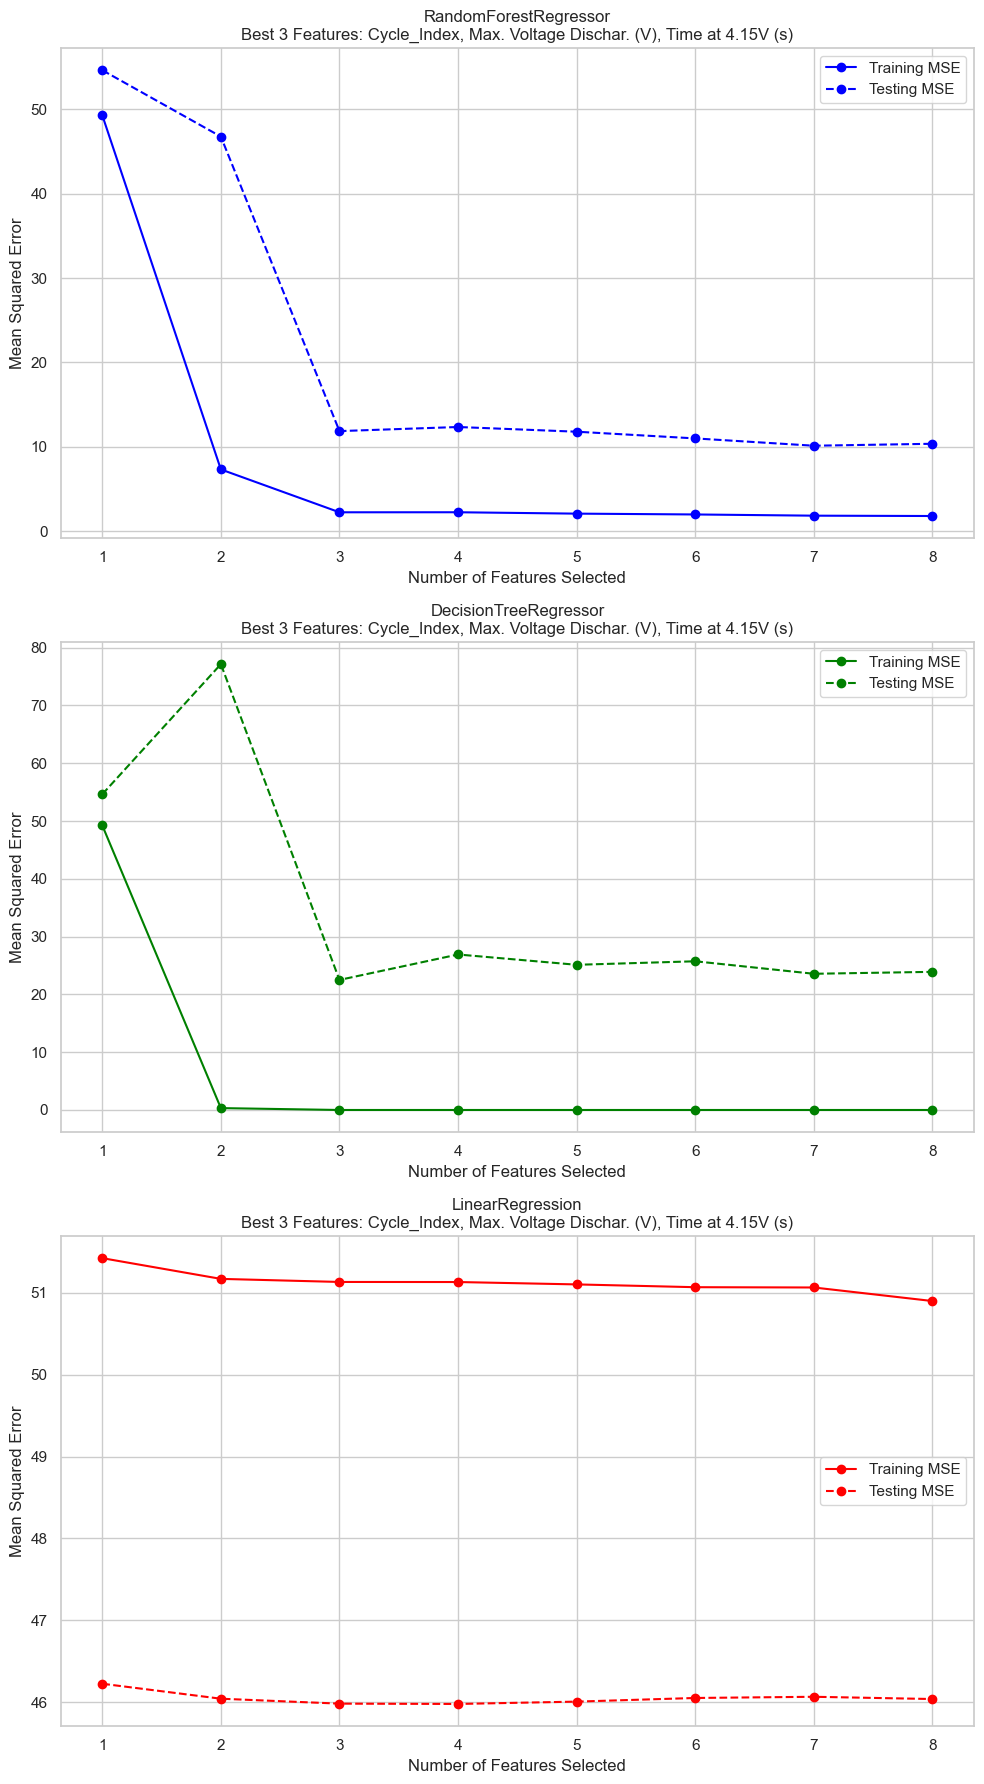

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store MSE values for each model
mse_train_rf = []
mse_test_rf = []
mse_train_dt = []
mse_test_dt = []
mse_train_lr = []
mse_test_lr = []
best_features_rf = None
best_features_dt = None
best_features_lr = None

# Helper function to get feature names
def get_feature_names(selector, X):
    return X.columns[selector.get_support()]

# Loop over different numbers of top features
for k in range(1, X_train.shape[1] + 1):
    # Select top k features using SelectKBest
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_kbest = selector.fit_transform(X_train, y_train)
    X_test_kbest = selector.transform(X_test)
    feature_names = get_feature_names(selector, X_train)

    # RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_kbest, y_train)
    y_pred_train_rf = rf_model.predict(X_train_kbest)
    y_pred_test_rf = rf_model.predict(X_test_kbest)
    mse_train_rf.append(mean_squared_error(y_train, y_pred_train_rf))
    mse_test_rf.append(mean_squared_error(y_test, y_pred_test_rf))
    if k == 3:
        best_features_rf = feature_names

    # DecisionTreeRegressor
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train_kbest, y_train)
    y_pred_train_dt = dt_model.predict(X_train_kbest)
    y_pred_test_dt = dt_model.predict(X_test_kbest)
    mse_train_dt.append(mean_squared_error(y_train, y_pred_train_dt))
    mse_test_dt.append(mean_squared_error(y_test, y_pred_test_dt))
    if k == 3:
        best_features_dt = feature_names

    # LinearRegression
    lr_model = LinearRegression()
    lr_model.fit(X_train_kbest, y_train)
    y_pred_train_lr = lr_model.predict(X_train_kbest)
    y_pred_test_lr = lr_model.predict(X_test_kbest)
    mse_train_lr.append(mean_squared_error(y_train, y_pred_train_lr))
    mse_test_lr.append(mean_squared_error(y_test, y_pred_test_lr))
    if k == 3:
        best_features_lr = feature_names

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# RandomForestRegressor
axs[0].plot(range(1, X_train.shape[1] + 1), mse_train_rf, label='Training MSE', marker='o', color='blue')
axs[0].plot(range(1, X_train.shape[1] + 1), mse_test_rf, label='Testing MSE', marker='o', color='blue', linestyle='dashed')
axs[0].set_title(f'RandomForestRegressor\nBest 3 Features: {", ".join(best_features_rf)}')
axs[0].set_xlabel('Number of Features Selected')
axs[0].set_ylabel('Mean Squared Error')
axs[0].legend()
axs[0].grid(True)

# DecisionTreeRegressor
axs[1].plot(range(1, X_train.shape[1] + 1), mse_train_dt, label='Training MSE', marker='o', color='green')
axs[1].plot(range(1, X_train.shape[1] + 1), mse_test_dt, label='Testing MSE', marker='o', color='green', linestyle='dashed')
axs[1].set_title(f'DecisionTreeRegressor\nBest 3 Features: {", ".join(best_features_dt)}')
axs[1].set_xlabel('Number of Features Selected')
axs[1].set_ylabel('Mean Squared Error')
axs[1].legend()
axs[1].grid(True)

# LinearRegression
axs[2].plot(range(1, X_train.shape[1] + 1), mse_train_lr, label='Training MSE', marker='o', color='red')
axs[2].plot(range(1, X_train.shape[1] + 1), mse_test_lr, label='Testing MSE', marker='o', color='red', linestyle='dashed')
axs[2].set_title(f'LinearRegression\nBest 3 Features: {", ".join(best_features_lr)}')
axs[2].set_xlabel('Number of Features Selected')
axs[2].set_ylabel('Mean Squared Error')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [55]:
xd=data_cleaned[['Cycle_Index','Max. Voltage Dischar. (V)','Min. Voltage Charg. (V)','Decrement 3.6-3.4V (s)']]

In [56]:
battery_data.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xd, y, test_size=0.2, random_state=42)

In [58]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [64]:
battery_data.shape

(15064, 9)

In [65]:
print('h')

h


In [66]:
battery_data.shape

(15064, 9)

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [68]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Grid Search for Gradient Boosting
param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

# Best model
best_gbr = grid_search_gbr.best_estimator_

# Evaluate model
y_pred_gbr = best_gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'Gradient Boosting Regressor - MSE: {mse_gbr}, R2: {r2_gbr}')


Gradient Boosting Regressor - MSE: 24.621459751221604, R2: 0.9997581156147504


In [69]:
# XGBoost Regressor
xgbr = xgb.XGBRegressor()

# Random Search for XGBoost
param_dist_xgbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search_xgbr = RandomizedSearchCV(estimator=xgbr, param_distributions=param_dist_xgbr, cv=3, scoring='neg_mean_squared_error', n_iter=10, n_jobs=-1, random_state=42)
random_search_xgbr.fit(X_train, y_train)

# Best model
best_xgbr = random_search_xgbr.best_estimator_

# Evaluate model
y_pred_xgbr = best_xgbr.predict(X_test)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'XGBoost Regressor - MSE: {mse_xgbr}, R2: {r2_xgbr}')


XGBoost Regressor - MSE: 24.11060772652965, R2: 0.999763134290702


In [70]:
from sklearn.ensemble import StackingRegressor

# Define base models
estimators = [
    ('gbr', best_gbr),
    ('xgbr', best_xgbr)
]

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=100, random_state=42))
stacking_regressor.fit(X_train, y_train)

# Evaluate model
y_pred_stacking = stacking_regressor.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
print(f'Stacking Regressor - MSE: {mse_stacking}, R2: {r2_stacking}')


Stacking Regressor - MSE: 30.735148112582344, R2: 0.9996980539544817


In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost Regressor
xgbr = xgb.XGBRegressor()

# Random Search for XGBoost
param_dist_xgbr = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1, 2]
}

random_search_xgbr = RandomizedSearchCV(estimator=xgbr, param_distributions=param_dist_xgbr, cv=5, scoring='neg_mean_squared_error', n_iter=100, n_jobs=-1, random_state=42)
random_search_xgbr.fit(X_train, y_train)

# Best model
best_xgbr = random_search_xgbr.best_estimator_

# Evaluate model
y_pred_xgbr = best_xgbr.predict(X_test)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
r2_xgbr = r2_score(y_test, y_pred_xgbr)
print(f'XGBoost Regressor - MSE: {mse_xgbr}, R2: {r2_xgbr}')


XGBoost Regressor - MSE: 19.227218090165675, R2: 0.999811109338163


In [73]:
# Add new feature: voltage difference during charge/discharge
data_cleaned['voltage_diff'] = battery_data['Max. Voltage Dischar. (V)'] - battery_data['Min. Voltage Charg. (V)']

# Updated features
features = data_cleaned[['Cycle_Index', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'voltage_diff']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\Tanuja chowdary\AppData\Local\Temp\ipykernel_34888\2624981114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['voltage_diff'] = battery_data['Max. Voltage Dischar. (V)'] - battery_data['Min. Voltage Charg. (V)']


In [74]:
battery_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error





# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(xd, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train = X_train.values
y_train = y_train.values

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
xgbr = XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_xgbr = grid_search.best_estimator_

# Initialize a list to store the MSE scores for each fold
mse_scores = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Fit the best model to the training fold
    best_xgbr.fit(X_train_kf, y_train_kf)
    
    # Predict on the validation fold
    y_pred = best_xgbr.predict(X_val_kf)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_val_kf, y_pred)
    mse_scores.append(mse)

# Print the mean and standard deviation of the MSE scores
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE: {np.std(mse_scores)}')

# Evaluate the model on the test set
y_test_pred = best_xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')


Mean MSE: 16.034719597692913
Standard Deviation of MSE: 1.0627076001705922
Test MSE: 14.832552598554296


In [76]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model for RFE
base_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform RFE
rfe = RFE(estimator=base_rf_model, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)

# Transform the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Define the hyperparameters grid to search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the transformed data
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_rfe, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the RandomForestRegressor with the best parameters on the selected features
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = best_rf_model.predict(X_train_rfe)
y_pred_test = best_rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Training MSE: 4.633765985885606
Training R2: 0.9999548509783007
Testing MSE: 15.448148904359856
Testing R2: 0.999848235399577


In [77]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base model for RFE
base_rf_model = RandomForestRegressor(random_state=42)

# Perform RFE
rfe = RFE(estimator=base_rf_model, n_features_to_select=3, step=1)
rfe.fit(X_train, y_train)

# Transform the training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Create a pipeline that includes polynomial features and scaling
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define the hyperparameters grid to search
param_distributions = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the transformed data
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train_rfe, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the RandomForestRegressor with the best parameters on the selected features
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train_rfe, y_train)

# Predictions
y_pred_train = best_rf_model.predict(X_train_rfe)
y_pred_test = best_rf_model.predict(X_test_rfe)

# Compute MSE and R2 on training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print results
print(f'Training MSE: {mse_train}')
print(f'Training R2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing R2: {r2_test}')


Best parameters found:  {'rf__n_estimators': 100, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': None, 'rf__bootstrap': True}
Training MSE: 4.57665668015794
Training R2: 0.9999554074218698
Testing MSE: 16.677368549190106
Testing R2: 0.9998361593877917


In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are your features and target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train=X_train.values
y_train=y_train.values

# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
xgbr = XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_xgbr = grid_search.best_estimator_

# Initialize lists to store the MSE and R² scores for each fold
train_mse_scores = []
val_mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

    # Fit the best model to the training fold
    best_xgbr.fit(X_train_kf, y_train_kf)
    
    # Predict on the training fold
    y_train_pred_kf = best_xgbr.predict(X_train_kf)
    
    # Predict on the validation fold
    y_val_pred_kf = best_xgbr.predict(X_val_kf)
    
    # Calculate the mean squared error for training and validation
    train_mse = mean_squared_error(y_train_kf, y_train_pred_kf)
    val_mse = mean_squared_error(y_val_kf, y_val_pred_kf)
    
    # Calculate the R² score for training and validation
    train_r2 = r2_score(y_train_kf, y_train_pred_kf)
    val_r2 = r2_score(y_val_kf, y_val_pred_kf)
    
    # Append the scores to the lists
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

# Print the mean and standard deviation of the MSE and R² scores
print(f'Mean Training MSE: {np.mean(train_mse_scores)}')
print(f'Standard Deviation of Training MSE: {np.std(train_mse_scores)}')
print(f'Mean Validation MSE: {np.mean(val_mse_scores)}')
print(f'Standard Deviation of Validation MSE: {np.std(val_mse_scores)}')
print(f'Mean Training R²: {np.mean(train_r2_scores)}')
print(f'Standard Deviation of Training R²: {np.std(train_r2_scores)}')
print(f'Mean Validation R²: {np.mean(val_r2_scores)}')
print(f'Standard Deviation of Validation R²: {np.std(val_r2_scores)}')

# Evaluate the model on the test set
y_test_pred = best_xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R²: {test_r2}')


Mean Training MSE: 1.4009339129115734
Standard Deviation of Training MSE: 0.0668245536044657
Mean Validation MSE: 11.768519415804032
Standard Deviation of Validation MSE: 0.6280997989343367
Mean Training R²: 0.9999863588972735
Standard Deviation of Training R²: 6.454276159454577e-07
Mean Validation R²: 0.9998853788002393
Standard Deviation of Validation R²: 5.637840744852963e-06
Test MSE: 11.14640108573959
Test R²: 0.99989063034011


In [79]:

import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X_train.values
y_train=y_train.values


# Create a KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
xgbr = XGBRegressor()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_xgbr = grid_search.best_estimator_

# Initialize lists to store the MSE, MAE, and R² scores for each fold
train_mse_scores = []
val_mse_scores = []
train_mae_scores = []
val_mae_scores = []
train_r2_scores = []
val_r2_scores = []

# Perform KFold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

    # Fit the best model to the training fold
    best_xgbr.fit(X_train_kf, y_train_kf)
    
    # Predict on the training fold
    y_train_pred_kf = best_xgbr.predict(X_train_kf)
    
    # Predict on the validation fold
    y_val_pred_kf = best_xgbr.predict(X_val_kf)
    
    # Calculate the mean squared error for training and validation
    train_mse = mean_squared_error(y_train_kf, y_train_pred_kf)
    val_mse = mean_squared_error(y_val_kf, y_val_pred_kf)
    
    # Calculate the mean absolute error for training and validation
    train_mae = mean_absolute_error(y_train_kf, y_train_pred_kf)
    val_mae = mean_absolute_error(y_val_kf, y_val_pred_kf)
    
    # Calculate the R² score for training and validation
    train_r2 = r2_score(y_train_kf, y_train_pred_kf)
    val_r2 = r2_score(y_val_kf, y_val_pred_kf)
    
    # Append the scores to the lists
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    train_mae_scores.append(train_mae)
    val_mae_scores.append(val_mae)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

# Print the mean and standard deviation of the MSE, MAE, and R² scores
print(f'Mean Training MSE: {np.mean(train_mse_scores)}')
print(f'Standard Deviation of Training MSE: {np.std(train_mse_scores)}')
print(f'Mean Validation MSE: {np.mean(val_mse_scores)}')
print(f'Standard Deviation of Validation MSE: {np.std(val_mse_scores)}')

print(f'Mean Training MAE: {np.mean(train_mae_scores)}')
print(f'Standard Deviation of Training MAE: {np.std(train_mae_scores)}')
print(f'Mean Validation MAE: {np.mean(val_mae_scores)}')
print(f'Standard Deviation of Validation MAE: {np.std(val_mae_scores)}')

print(f'Mean Training R²: {np.mean(train_r2_scores)}')
print(f'Standard Deviation of Training R²: {np.std(train_r2_scores)}')
print(f'Mean Validation R²: {np.mean(val_r2_scores)}')
print(f'Standard Deviation of Validation R²: {np.std(val_r2_scores)}')

# Evaluate the model on the test set
y_test_pred = best_xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test R²: {test_r2}')


Mean Training MSE: 1.547397474813664
Standard Deviation of Training MSE: 0.013187848227021869
Mean Validation MSE: 10.956849731823837
Standard Deviation of Validation MSE: 1.2430733329301158
Mean Training MAE: 0.9170543135237643
Standard Deviation of Training MAE: 0.0024737118673638365
Mean Validation MAE: 2.138532122569154
Standard Deviation of Validation MAE: 0.09703269459369833
Mean Training R²: 0.9999849221794792
Standard Deviation of Training R²: 1.1562973564648265e-07
Mean Validation R²: 0.9998930096755109
Standard Deviation of Validation R²: 1.3329836418411178e-05
Test MSE: 10.296400240257235
Test MAE: 2.1119572892051397
Test R²: 0.9998988468406194
